In [1]:
%load_ext google.cloud.bigquery

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 15 years ago. So if today is 2024.05.17 then the weather we want to forecast is for the date 2009.05.18. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [2]:
# Setting the environment variable with the project ID
import os
os.environ["GOOGLE_CLOUD_PROJECT"] = "mystical-axiom-427110-g0"

In [3]:
%%bigquery
SELECT
  *
FROM `bigquery-public-data.samples.gsod`
LIMIT 20


Downloading: 100%|██████████| 20/20 [00:01<00:00, 13.04rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,12,11,45.500000,4,43.500000,4.0,981.400024,...,NaN,None,NaN,NaN,False,False,False,False,False,False
1,37770,99999,1929,12,6,47.000000,4,41.299999,4.0,993.099976,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,31590,99999,1929,12,6,45.799999,4,38.299999,4.0,974.500000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
3,30910,99999,1929,11,25,49.799999,4,NaN,NaN,986.500000,...,NaN,None,0.04,NaN,False,False,False,False,False,False
4,33790,99999,1929,8,29,62.000000,4,56.299999,4.0,1015.599976,...,NaN,None,0.00,NaN,False,False,False,False,False,False
5,38110,99999,1929,11,2,47.799999,4,44.000000,4.0,1027.900024,...,NaN,None,NaN,NaN,False,False,False,False,False,False
6,33790,99999,1929,9,17,55.700001,4,52.799999,4.0,1021.799988,...,NaN,None,0.00,NaN,True,True,True,True,True,True
7,30750,99999,1929,12,7,43.299999,4,41.799999,4.0,966.599976,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,34970,99999,1929,8,26,62.599998,4,56.000000,4.0,1023.500000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
9,37770,99999,1929,12,19,36.000000,4,28.799999,4.0,1033.099976,...,NaN,None,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
# Import the BigQuery client and create a client for the project
from google.cloud import bigquery
client = bigquery.Client(project='mystical-axiom-427110-g0')

In [5]:
query = """
SELECT
  station_number,
  wban_number,
  CONCAT(CAST(year AS STRING), '-', LPAD(CAST(month AS STRING), 2, '0'), '-', LPAD(CAST(day AS STRING), 2, '0')) AS date,
  mean_temp,
  num_mean_temp_samples,
  mean_dew_point,
  num_mean_dew_point_samples,
  mean_sealevel_pressure,
  num_mean_sealevel_pressure_samples,
  mean_station_pressure,
  num_mean_station_pressure_samples,
  mean_visibility,
  num_mean_visibility_samples,
  mean_wind_speed,
  num_mean_wind_speed_samples,
  max_sustained_wind_speed,
  max_gust_wind_speed,
  max_temperature,
  max_temperature_explicit,
  min_temperature,
  min_temperature_explicit,
  total_precipitation,
  snow_depth,
  fog,
  rain,
  snow,
  hail,
  thunder,
  tornado
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  CAST(year AS INT64) BETWEEN 2005 AND 2009
  AND station_number BETWEEN 725300 AND 726300
"""


In [6]:
# Execute the query
query_job = client.query(query)

# Fetch query results to DataFrame
data = query_job.to_dataframe()

In [7]:
# Display the first 5 rows of the Dataframe
data.head()

,station_number,wban_number,date,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725848,99999,2005-10-16,63.900002,4,48.200001,4.0,1016.099976,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,725940,99999,2005-10-15,56.500000,4,51.799999,4.0,1014.299988,4.0,1011.700012,...,NaN,None,1.0,NaN,False,False,False,False,False,False
2,725848,99999,2005-06-07,56.799999,4,46.900002,4.0,1019.000000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
3,725848,99999,2005-01-30,52.200001,4,44.599998,4.0,1026.099976,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,725868,99999,2005-12-11,9.300000,5,5.000000,5.0,NaN,NaN,NaN,...,NaN,None,0.0,5.1,False,False,False,False,False,False


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [8]:
# Import libraries
import pandas as pd

In [9]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

In [10]:
# Filter for station numbers between 725300 and 725330 and dates between 2005 and 2009
filtered_data = data[(data['station_number'] >= 725300) & 
                (data['station_number'] <= 725330) & 
                 (data['date'].dt.year >= 2005) & 
                 (data['date'].dt.year <= 2009)]

print(filtered_data)

        station_number  wban_number       date  mean_temp  \
26              725316        99999 2005-06-10  81.400002   
61              725315        99999 2005-03-12  31.799999   
90              725327        99999 2005-03-03  24.200001   
98              725327        99999 2005-04-19  68.900002   
111             725314        99999 2005-06-09  73.900002   
...                ...          ...        ...        ...   
377748          725317        53802 2009-09-03  66.500000   
377757          725305        94892 2009-07-21  70.699997   
377767          725316         3887 2009-06-03  60.599998   
377776          725300        94846 2009-07-26  72.099998   
377780          725316         3887 2009-06-30  70.800003   

        num_mean_temp_samples  mean_dew_point  num_mean_dew_point_samples  \
26                         13       67.000000                        13.0   
61                         20       22.600000                        20.0   
90                         23       

In [11]:
# Set date as index 
filtered_data.set_index('date', inplace=True)

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [12]:
# Check which of the columns have highest percentage of missing values
filtered_data.apply(pd.isnull).sum()/filtered_data.shape[0]*100

station_number                          0.000000
wban_number                             0.000000
mean_temp                               0.000000
num_mean_temp_samples                   0.000000
mean_dew_point                          0.011032
num_mean_dew_point_samples              0.011032
mean_sealevel_pressure                 10.138452
num_mean_sealevel_pressure_samples     10.138452
mean_station_pressure                  94.522588
num_mean_station_pressure_samples      94.522588
mean_visibility                         0.016548
num_mean_visibility_samples             0.016548
mean_wind_speed                         0.027580
num_mean_wind_speed_samples             0.027580
max_sustained_wind_speed                0.055160
max_gust_wind_speed                    36.742236
max_temperature                         0.011032
max_temperature_explicit                0.011032
min_temperature                       100.000000
min_temperature_explicit              100.000000
total_precipitation 

##### By the above information we can drop columns with 94%-100% missing values

In [13]:
#Drop the columns 'mean_station_pressure', 'num_mean_station_pressure_samples', 'min_temperature', 'min_temperature_explicit'
filtered_data = filtered_data.drop(columns = ['mean_station_pressure', 'num_mean_station_pressure_samples','min_temperature', 'min_temperature_explicit'])

In [14]:
# Display the columns of the Filtered Data
filtered_data.columns


Index(['station_number', 'wban_number', 'mean_temp', 'num_mean_temp_samples',
       'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'tornado'],
      dtype='object')

##### Columns not specific to snow can be dropped as well

In [15]:
# wban_number is just 99999 which can mean either the data is missing or not collected at all
# Number of samples does not provide any relevant information about snow and is just for calculation of mean values.
# Max temperature explicit is not really needed
filtered_data = filtered_data.drop(columns = ['wban_number','num_mean_temp_samples',
       'num_mean_dew_point_samples', 'num_mean_sealevel_pressure_samples',
       'num_mean_visibility_samples', 'num_mean_wind_speed_samples',
       'max_temperature_explicit'])

In [16]:
#  Replace any missing values (NaN) in the DataFrame with 0
filtered_data = filtered_data.fillna(0)

In [17]:
# Display the Filtered Data
filtered_data

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
date,,,,,,,,,,,,,,,,,
2005-06-10,725316,81.400002,67.000000,1012.200012,10.0,9.1,12.0,0.0,73.400002,0.00,0.0,False,False,False,False,False,False
2005-03-12,725315,31.799999,22.600000,1000.799988,9.7,13.3,20.0,27.0,24.799999,0.01,0.0,False,False,False,False,False,False
2005-03-03,725327,24.200001,16.299999,1022.000000,8.7,5.3,8.0,0.0,15.100000,0.00,0.0,False,False,False,False,False,False
2005-04-19,725327,68.900002,37.599998,1015.700012,10.0,9.3,19.0,25.1,55.000000,0.00,0.0,False,False,False,False,False,False
2005-06-09,725314,73.900002,67.099998,1011.799988,9.8,5.4,12.0,22.9,64.000000,0.06,0.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-09-03,725317,66.500000,57.900002,1019.299988,7.6,3.0,8.9,0.0,53.099998,0.00,0.0,False,False,False,False,False,False
2009-07-21,725305,70.699997,56.299999,1016.700012,9.5,4.4,8.9,0.0,60.099998,0.00,0.0,False,False,False,False,False,False
2009-06-03,725316,60.599998,56.500000,1017.500000,7.4,11.2,16.9,22.0,55.000000,0.06,0.0,False,False,False,False,False,False


In [18]:
# Make sure values are numerical 
filtered_data.dtypes

station_number                int64
mean_temp                   float64
mean_dew_point              float64
mean_sealevel_pressure      float64
mean_visibility             float64
mean_wind_speed             float64
max_sustained_wind_speed    float64
max_gust_wind_speed         float64
max_temperature             float64
total_precipitation         float64
snow_depth                  float64
fog                            bool
rain                           bool
snow                           bool
hail                           bool
thunder                        bool
tornado                        bool
dtype: object

In [19]:
# List of columns with boolean values
boolean_columns = ['fog', 'rain','snow','hail', 'thunder', 'tornado']

# Convert boolean columns to 0/1 (Integer)
filtered_data[boolean_columns] = filtered_data[boolean_columns].astype(int)

In [20]:
# Display the data type of the variables
filtered_data.dtypes

station_number                int64
mean_temp                   float64
mean_dew_point              float64
mean_sealevel_pressure      float64
mean_visibility             float64
mean_wind_speed             float64
max_sustained_wind_speed    float64
max_gust_wind_speed         float64
max_temperature             float64
total_precipitation         float64
snow_depth                  float64
fog                           int64
rain                          int64
snow                          int64
hail                          int64
thunder                       int64
tornado                       int64
dtype: object

In [21]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

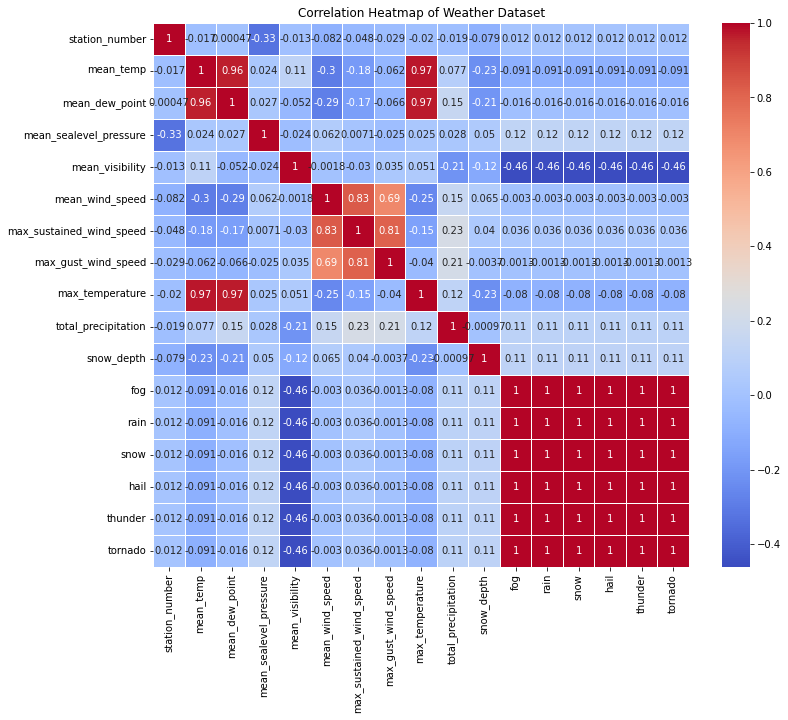

In [22]:
# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Dataset')
plt.show()

In [23]:
# Calculate the correlation of each column with the 'snow' column and sort them in descending order
correlation = filtered_data.corr()['snow'].sort_values(ascending=False)
print(correlation)

snow                        1.000000
fog                         1.000000
hail                        1.000000
tornado                     1.000000
thunder                     1.000000
rain                        1.000000
mean_sealevel_pressure      0.121075
snow_depth                  0.111154
total_precipitation         0.105170
max_sustained_wind_speed    0.035719
station_number              0.012204
max_gust_wind_speed        -0.001276
mean_wind_speed            -0.002954
mean_dew_point             -0.015603
max_temperature            -0.079723
mean_temp                  -0.090885
mean_visibility            -0.461095
Name: snow, dtype: float64


In [24]:
# Drop the columns with really low and really high correlation with 'snow'
filtered_data = filtered_data.drop(columns = ['max_gust_wind_speed', 'mean_wind_speed', 'mean_dew_point', 'max_temperature', 'mean_temp', 'mean_visibility', 'fog', 'rain', 'thunder', 'hail', 'tornado'])

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [25]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]


'2009-06-29'

In [26]:
from sklearn.model_selection import train_test_split

# Define the date for the test set
test_date = str(dt.datetime.today()- dt.timedelta(days=15*365) + dt.timedelta(days=1)).split(' ')[0]

# Split the data into training, evaluation, and test sets
train_eval = filtered_data[filtered_data.index < test_date]  # Training + Evaluation data should be before test data
test = filtered_data[filtered_data.index == test_date]       # Test data

# Define features and target for training and validation sets
X_train = train_eval.drop('snow', axis=1)
y_train = train_eval['snow']

# Randomly split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define features and target for test set
X_test = test.drop('snow', axis=1)
y_test = test['snow']

# Print lengths of train, validation, and test sets
print(f"Length of Training Set: {len(X_train)}")
print(f"Length of Validation Set: {len(X_val)}")
print(f"Length of Test Set: {len(X_test)}")

Length of Training Set: 13040
Length of Validation Set: 3260
Length of Test Set: 9


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [27]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=15*365)).split(' ')[0]

'2009-06-29'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

##### The Random Forest classifier was chosen for its robustness and ability to handle noisy data.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

class SnowPredictionModel:
    def __init__(self, n_estimators=100, random_state=42):
        # Initialize the RandomForestClassifier
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    
    
    def train(self, X_train, y_train):
        # Train the model
        self.model.fit(X_train, y_train)
    
    def evaluate(self, X, y, dataset_name="Validation"):
        # Predict and evaluate the model
        preds = self.model.predict(X)
        accuracy = accuracy_score(y, preds)
        print(f"{dataset_name} Accuracy: {accuracy:.4f}")
        return preds, accuracy
    
    def report(self, y_true, y_preds):
        # Print classification report
        print("\nClassification Report:")
        print(classification_report(y_true, y_preds))
    
    def print_predictions(self, test, y_preds):
        # Print the predictions
        for station, prediction in zip(test['station_number'], y_preds):
            print(f"Station {station}: {'Snow' if prediction else 'No Snow'}")

def main(X_train, y_train, X_val, y_val, X_test, y_test, test):
    # Initialize the model
    snow_model = SnowPredictionModel()
    print("Training data shape:", X_train.shape)
    
    # Train the model
    snow_model.train(X_train, y_train)
    
    # Evaluate on the validation set
    val_preds, val_accuracy = snow_model.evaluate(X_val, y_val, "Validation")
    
    # Evaluate on the test set
    test_preds, test_accuracy = snow_model.evaluate(X_test, y_test, "Test")
    
    # Print predictions for the test set
    print(f"Printing predictions for the date : {test_date}")
    snow_model.print_predictions(test, test_preds)
    
    # Print the classification report for the test set
    snow_model.report(y_test, test_preds)

# Call the main function with the appropriate variables
main(X_train, y_train, X_val, y_val, X_test, y_test, test)

Training data shape: (13040, 5)
Validation Accuracy: 0.8509
Test Accuracy: 1.0000
Printing predictions for the date : 2009-06-30
Station 725315: No Snow
Station 725320: No Snow
Station 725330: No Snow
Station 725314: No Snow
Station 725300: No Snow
Station 725317: No Snow
Station 725327: No Snow
Station 725305: No Snow
Station 725316: No Snow

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

